# Introduction to OpenCV
https://docs.opencv.org/4.5.2/da/df6/tutorial_py_table_of_contents_setup.html

In [275]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

%matplotlib inline

## Histograms

So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis.

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram. Below is an image from Cambridge in Color website, and I recommend you to visit the site for more details.

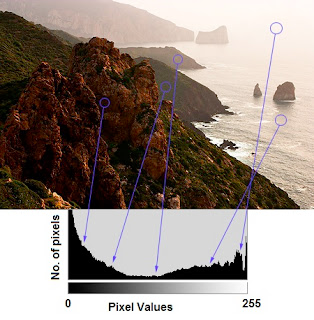

- dims: number of parameters for which we collect the data. gray = 1, color = 3
- range: range of intensity values you want to measure. Normally, it is [0,256], ie all intensity values.
- bins: The above histogram shows the number of pixels for every pixel value, ie from 0 to 255. ie you need 256 values to show the above histogram. But consider, what if you need not find the number of pixels for all pixel values separately, but number of pixels in a interval of pixel values? say for example, you need to find the number of pixels lying between 0 to 15, then 16 to 31, ..., 240 to 255. You will need only 16 values to represent the histogram. 

### cv2.calcHist(images, channels, mask, histSize, ranges)
- images
- channels = dims : gray 0, B/G/R put 0/1/2
- mask : area to calculate, None if whole picture
- histSize = bins
- ranges = range

In [327]:
img = cv.imread('hist.jpg', 0)

In [328]:
hist1 = cv.calcHist([img], [0], None, [256], [0, 256])

In [329]:
hist2 = np.bincount(img.ravel(), minlength=256)

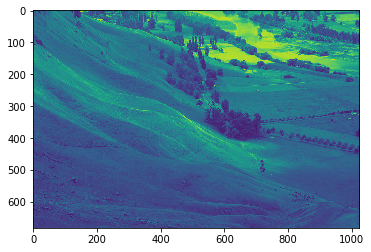

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

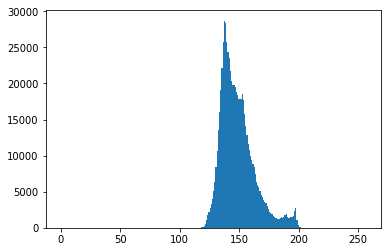

In [330]:
plt.imshow(img), plt.show()
plt.hist(img.ravel(), 256, [0, 256])

## Histogram Equalization 
Consider an image whose pixel values are confined to some specific range of values only. For eg, brighter image will have all pixels confined to high values. But a good image will have pixels from all regions of the image. So you need to stretch this histogram to either ends (as given in below image, from wikipedia) and that is what Histogram Equalization does (in simple words). This normally improves the contrast of the image.

To read : https://en.wikipedia.org/wiki/Histogram_equalization

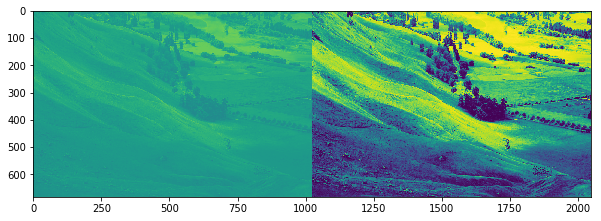

In [325]:
img = cv.imread('hist.jpg', 0)
equ = cv.equalizeHist(img)

plt.figure(figsize=(10, 10))
plt.imshow(np.hstack((img, equ)))

### CLAHE (Contrast Limited Adaptive Histogram Equalization) 

The first histogram equalization we just saw, considers the global contrast of the image. In many cases, it is not a good idea. For example, below image shows an input image and its result after global histogram equalization.

In [339]:
img = cv.imread("tsukuba.jpg", 0)

In [340]:
equ = cv.equalizeHist(img)

In [341]:
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(img)

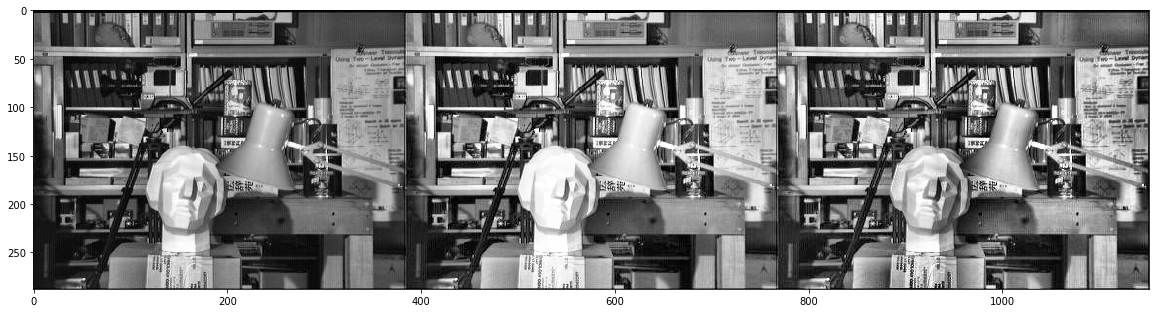

In [345]:
plt.figure(figsize=(20, 20))
plt.imshow(np.hstack((img, equ, cl1)), 'gray')

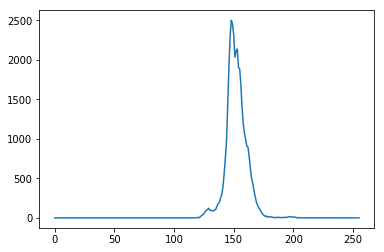

In [347]:
img = cv.imread('hist.jpg', 0)
mask = np.zeros(img.shape, dtype=np.uint8)
mask[:200, :200] = 255

hist_mask = cv.calcHist([img], [0], mask, [256], [0, 256])

plt.plot(hist_mask)
plt.show()